## Лекція 65. Детекція облич та об'єктів

### Завдання:

#### Завантажте зображення titanic.jpg, що знаходиться в репозиторїї лекції. 
#### Застосуйте до нього методи детекції облич Віоли-Джонса та HOG.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from imutils import face_utils

### `Метод детекції облич Віоли-Джонса`

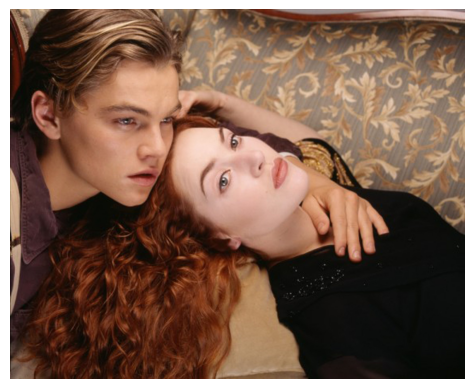

In [2]:
# Завантажуємо зображення та класифікатор
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
img = cv2.imread("titanic.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show;

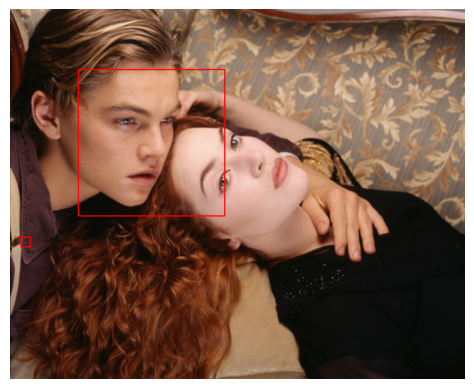

In [3]:
# Застосовуємо класифікатор
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 5)
plt.imshow(img1)
plt.axis('off')
plt.show;

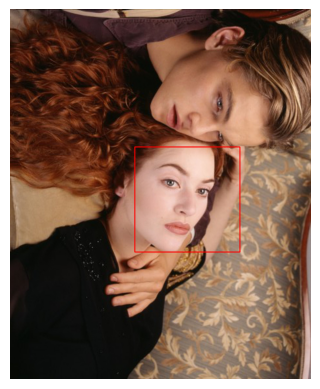

In [4]:
# Повернемо зображення на 90 градусів і повторимо розпізнавання
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
gray = cv2.cvtColor(img90, cv2.COLOR_BGR2GRAY)
img11 = cv2.cvtColor(img90, cv2.COLOR_BGR2RGB)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img11, (x, y), (x+w, y+h), (255, 0, 0), 5)
plt.imshow(img11)
plt.axis('off')
plt.show;

#### Як бачимо не всі обличчя вдається розпізнати, все залежить від кута повороту обличчя. При повороті зображення на 90 градусів розпізнаєтья друге обляччя, а перше вже ні.

### `Метод детекції облич HOG`

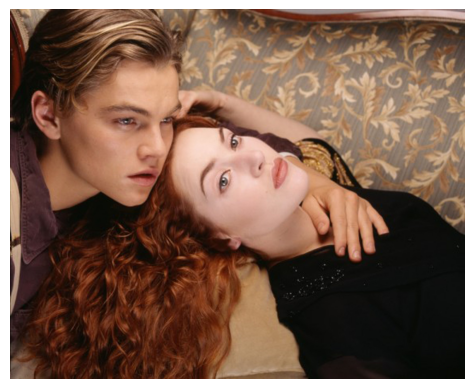

In [5]:
# Завантажуємо зображення
img = cv2.imread("titanic.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show;

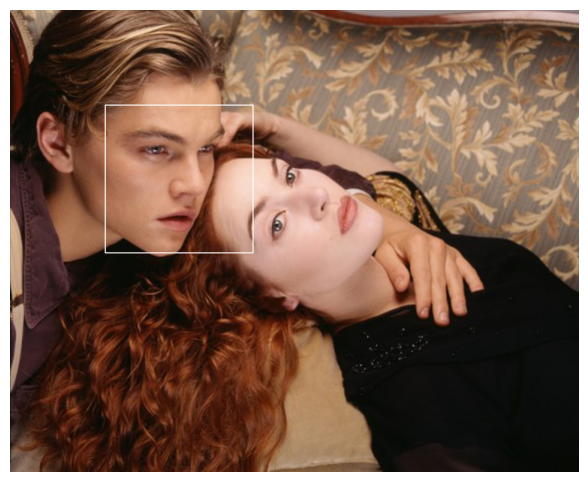

In [6]:
# Проводимо розпізнавання облич на кольоровому фото
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(img1, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img1, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show();

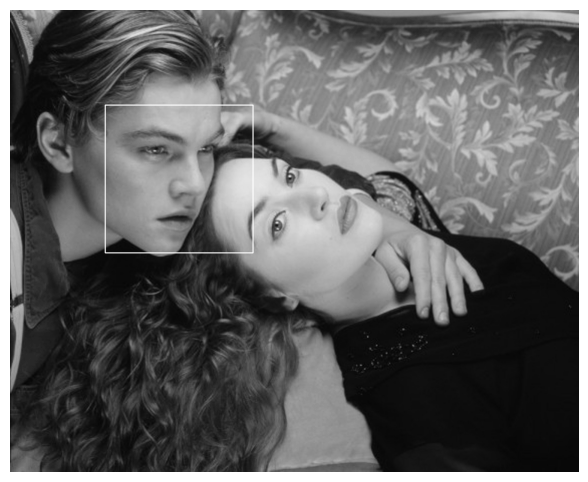

In [7]:
# Проводимо розпізнавання облич на чб фото
gray = cv2.imread('titanic.jpg', 0)
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show();

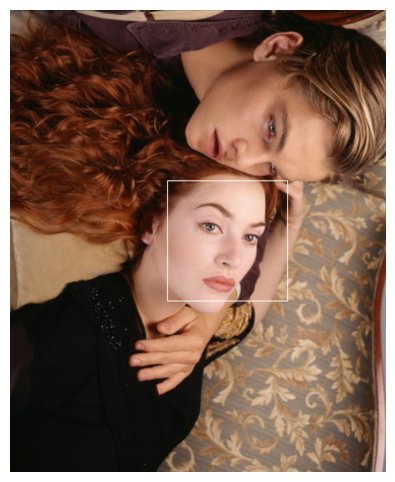

In [8]:
# Повернемо зображення на 90 градусів і повторимо розпізнавання
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img11 = cv2.cvtColor(img90, cv2.COLOR_BGR2RGB)
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(img11, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img11, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(img11, cmap='gray')
plt.axis('off')
plt.show();

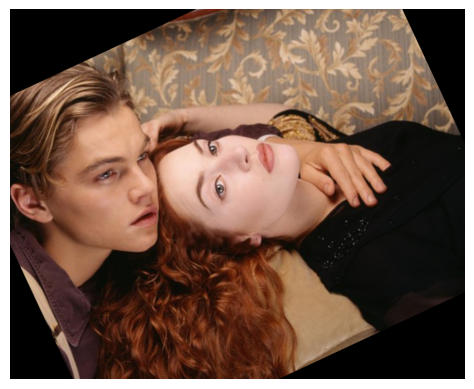

In [9]:
# Повернемо зображення на певний кут
def rotate_image(img, angle):
    # Отримуємо висоту та ширину зображення
    (h, w) = img.shape[:2]
    # Обчислюємо центр зображення
    center = (w / 2, h / 2)
    # Обчислюємо матрицю перетворення та повертаємо зображення
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img

sat = rotate_image(img, 25)
sat1 = cv2.cvtColor(sat, cv2.COLOR_BGR2RGB)
plt.imshow(sat1)
plt.axis('off')
plt.show;

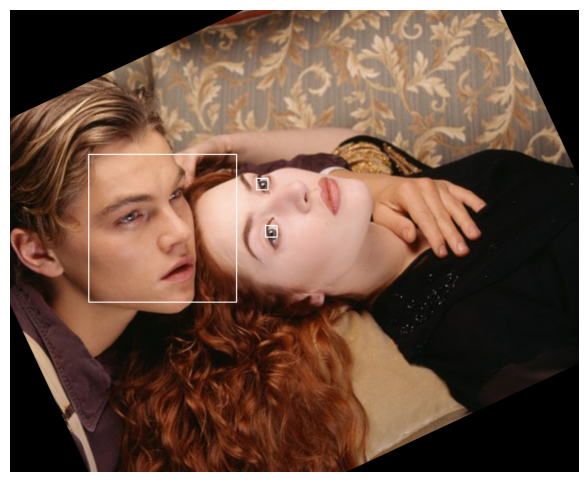

In [10]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(sat1, 1)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(sat1, (x, y), (x + w, y + h), (255, 255, 255), 3)
    
plt.figure(figsize=(10,6))
plt.imshow(sat1, cmap='gray')
plt.axis('off')
plt.show();

#### При повороті зображення на певні кути, детекція не завжди працює коректно, а обидва обличчя одночасно детектувати не вдалося.

### Як бачимо обидва методи розпізнавання облич працюють приблизно однаково. Розпізнавання облич залежить від кута їх нахилу. Кольорові та чорно-білі зображення розпізнаються однаково.